### Ensemble Machine Learning - Boosting Classifier
This notebook implements an ensemble boosting - AdaBoost - classifier from sklearn. This will create a series of weak classifiers and produce a strong classifier from them. This works differently to the ensemble method in bagging used in another notebook template. Here the pool of weak learners will have a stage value per learner. We then use the sum of the weighted predictions from the weak learners on a new test instance. We keep adding models until the maximum is reached (configurable sklearn parameter). Transformation on our diabetes dataset is not done here.

We import pandas, sklearn, train_test_split and the ensemble AdaBoost classifier library options.

In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import seaborn as sns
from matplotlib import pyplot

#### Exploratory Data Analysis
We use the diabetes dataset. For information about this dataset, refer to the Kaggle dataset library summary:
- https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

This will predict whether a patient does or does not have diabetes. We have multiple predictor variables and one target variable - Outcome.

In [2]:
diabetes_df = pd.read_csv("../datasets/diabetes.csv")

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_df.shape

(768, 9)

In [6]:
diabetes_df.size

6912

In [7]:
diabetes_df.ndim

2

In [8]:
# The .T at the end displays the transpose i.e. we flip the columns to be the rows and rows become the columns
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
diabetes_df.sample(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
458,10,148,84,48,237,37.6,1.001,51,1
197,3,107,62,13,48,22.9,0.678,23,1
206,8,196,76,29,280,37.5,0.605,57,1
142,2,108,52,26,63,32.5,0.318,22,0
662,8,167,106,46,231,37.6,0.165,43,1


Verify if any null values in the dataframe for a given data column.

In [10]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
diabetes_df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [12]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

The following calculates the pairwise correlation of columns. It does not include NA/null values.
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [14]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Produce data visualization histogram plots for the pandas dataframe for the diabetes dataset and focus on the input feature distributions as we are going to scale the input data before training the model.

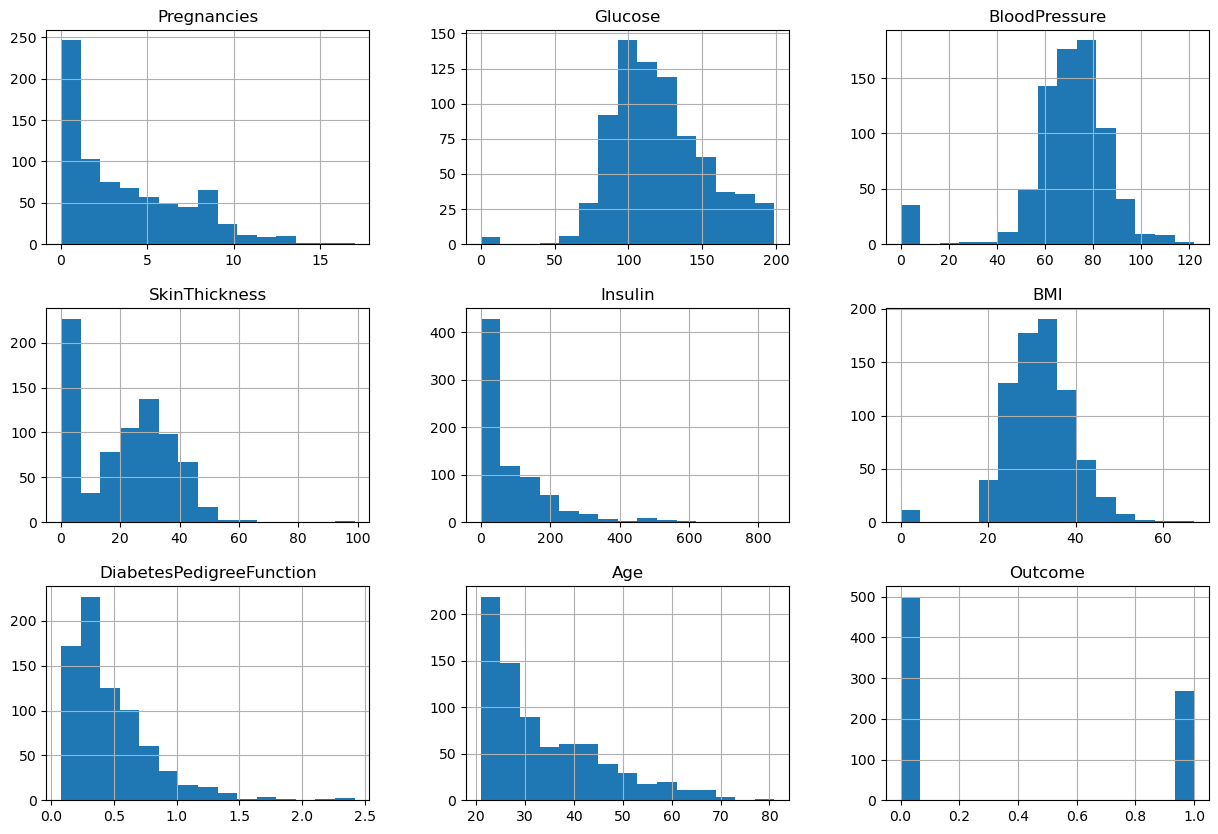

In [15]:
# Get histogram for each numeric variable - 9 variables so layout = 3x3
features_including_output_label = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes_df[features_including_output_label].hist(bins=15, figsize=(15, 10), layout=(3, 3));

##### Create a train:test split on the dataset
Next, we define our train:test split using sklearn library. This lets us define our supervised learning training set and a holdout test data subset. We will use a 10% portion of the dataset as a test set. We will use this to test the accuracy of the ensemble AdaBoost ML model on data it has not seen before in training and if it has overfit during training or can generalize to unseen data.

In [16]:
# split into features and categorical predictor variable (0 or 1)
X = diabetes_df.iloc[: , :8]
y = diabetes_df.iloc[: , -1]

# split into train and test sets with sklearn native train_test_split 10% test, set random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=44)

In [17]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
656,2,101,58,35,90,21.8,0.155,22
190,3,111,62,0,0,22.6,0.142,21
413,1,143,74,22,61,26.2,0.256,21
243,6,119,50,22,176,27.1,1.318,33
476,2,105,80,45,191,33.7,0.711,29
...,...,...,...,...,...,...,...,...
96,2,92,62,28,0,31.6,0.130,24
571,2,130,96,0,0,22.6,0.268,21
173,1,79,60,42,48,43.5,0.678,23
753,0,181,88,44,510,43.3,0.222,26


In [18]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
452,0,91,68,32,210,39.9,0.381,25
370,3,173,82,48,465,38.4,2.137,25
746,1,147,94,41,0,49.3,0.358,27
122,2,107,74,30,100,33.6,0.404,23
614,11,138,74,26,144,36.1,0.557,50
...,...,...,...,...,...,...,...,...
246,10,122,68,0,0,31.2,0.258,41
659,3,80,82,31,70,34.2,1.292,27
667,10,111,70,27,0,27.5,0.141,40
366,6,124,72,0,0,27.6,0.368,29


In [19]:
X_train.shape

(691, 8)

In [20]:
X_test.shape

(77, 8)

##### Machine Learning Model and Training
Construct an ensemble AdaBoost classifier using sklearn.

In [21]:
# construct AdaBoost classifier - set estimators to 5000 and switch default learning rate to 0.01
# should give accuracy of about 83% to accuracy in high 70s for default parameters
ensemble_adaboost_clf = AdaBoostClassifier(n_estimators=5000, learning_rate=0.01, random_state=0)

In [22]:
ensemble_adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=5000, random_state=0)

##### Decision Tree Model: Run Predictions, Evaluate Performance
We now run the predictive analytics against the test dataset and calculate the accuracy of the ensemble ML model when predicting on new data, our test dataset.

In [23]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
452,0,91,68,32,210,39.9,0.381,25
370,3,173,82,48,465,38.4,2.137,25
746,1,147,94,41,0,49.3,0.358,27
122,2,107,74,30,100,33.6,0.404,23
614,11,138,74,26,144,36.1,0.557,50
...,...,...,...,...,...,...,...,...
246,10,122,68,0,0,31.2,0.258,41
659,3,80,82,31,70,34.2,1.292,27
667,10,111,70,27,0,27.5,0.141,40
366,6,124,72,0,0,27.6,0.368,29


Run predictions using the ensemble AdaBoost model on the diabetes test dataset created earlier.

In [24]:
y_pred = ensemble_adaboost_clf.predict(X_test)

Include the sklearn classification report for precision, recall, f1-score, and support metrics.

In [25]:
metrics = classification_report(y_test, y_pred, output_dict=False)
print(metrics)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        42
           1       0.89      0.71      0.79        35

    accuracy                           0.83        77
   macro avg       0.84      0.82      0.83        77
weighted avg       0.84      0.83      0.83        77



We can see above that the ensemble is giving about 10% improvement (83% accuracy) in performance over the base template DecisionTree notebook (73%) in another folder in this library of base templates.

In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[39,  3],
       [10, 25]])

Below is a useful sklearn confusion matrix display utility plot. I always refer to it ever I need to check the array dimensions for true label, predicted labels. Seaborn is used later for an alternative display plot with text labels.

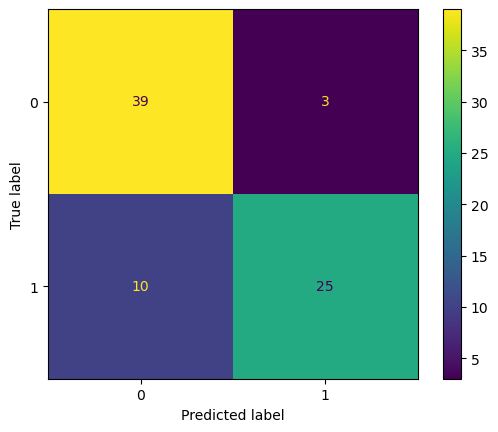

In [27]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
ConfusionMatrixDisplay(cm).plot()

<AxesSubplot:>

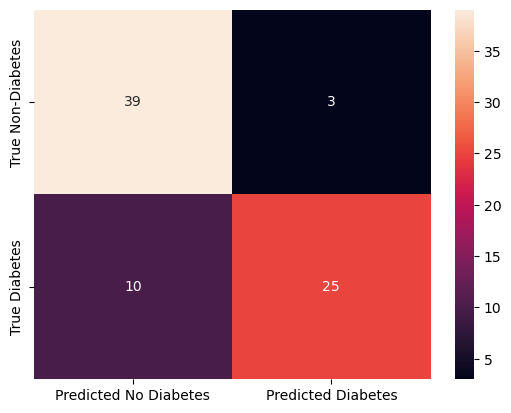

In [28]:
df_confusion_matrix = pd.DataFrame(cm, ['True Non-Diabetes', 'True Diabetes'],
                     ['Predicted No Diabetes', 'Predicted Diabetes'])

sns.heatmap(df_confusion_matrix, annot=True, fmt='g')

#### Web Reference
- https://en.wikipedia.org/wiki/Boosting_(machine_learning)
- https://en.wikipedia.org/wiki/E_(mathematical_constant)
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html